In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam

# Define paths
dataset_dir = './horse-or-human/horse-or-human'  # Single main directory with all images in subdirectories (train/test split handled here)


In [7]:

# Step 1: Load and Split the Dataset
# Image generators with train/test split
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% training, 20% testing

# Training data
train_data = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Specify as training data
)

# Test data
test_data = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Specify as validation (test) data
    shuffle=False
)


Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


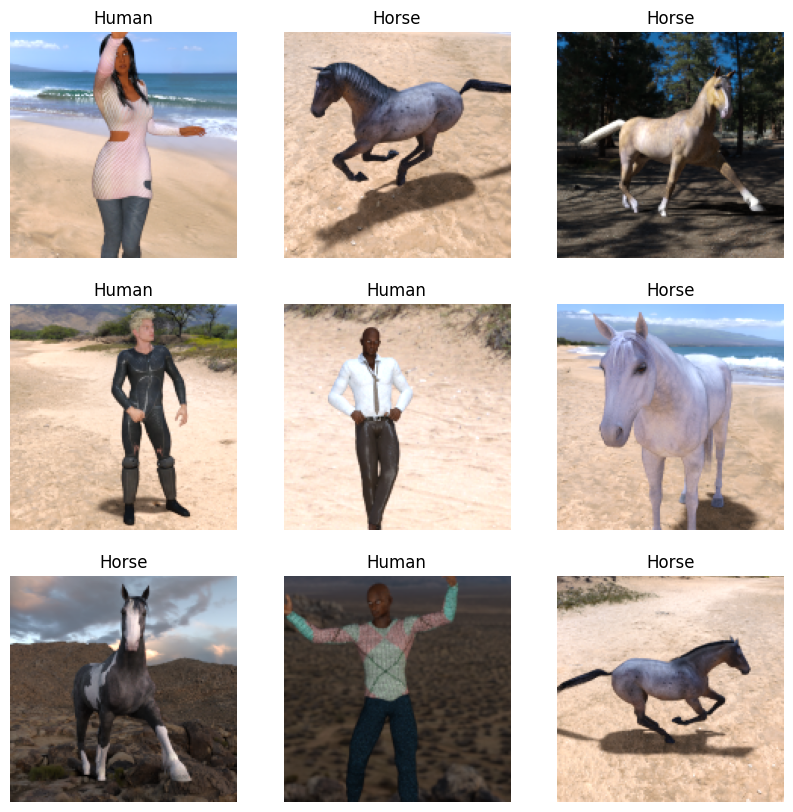

C:\Users\Sanju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:

# 2. Visualize some samples
x, y = next(train_data)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i])
    plt.title('Human' if y[i] == 1 else 'Horse')
    plt.axis('off')
plt.show()

# 3. Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.6945 - loss: 0.6050 - val_accuracy: 0.9610 - val_loss: 0.1118
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9606 - loss: 0.1169 - val_accuracy: 0.9366 - val_loss: 0.1096
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9832 - loss: 0.0392 - val_accuracy: 0.9805 - val_loss: 0.0568
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 789ms/step - accuracy: 0.9983 - loss: 0.0111 - val_accuracy: 0.9610 - val_loss: 0.0922
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 678ms/step - accuracy: 0.9720 - loss: 0.0740 - val_accuracy: 0.9707 - val_loss: 0.0756
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 699ms/step - accuracy: 0.9966 - loss: 0.0107 - val_accuracy: 0.8927 - val_loss: 0.3092
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 653ms/step - accuracy: 0.9958 - loss: 0.0151 - val_accuracy: 0.9805 - val_loss: 0.0587
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 771ms/step - accuracy: 0.9995 - loss: 0.0052 - val_accuracy: 0.9

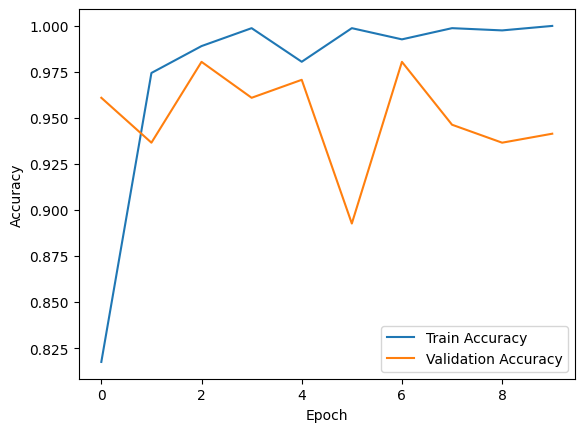

In [17]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the model
history = model.fit(train_data, epochs=10,batch_size=64, validation_data=test_data)

# 5. Evaluate on the test set
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.2f}, Test Accuracy: {accuracy:.2f}")

# 6. Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
def plot_confusion_matrix(model, data, title):
    # Get predictions
    predictions = (model.predict(data) > 0.5).astype("int32")
    
    # Get true labels
    true_labels = data.classes
    
    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Human", "Horse"])
    disp.plot(cmap="Blues")
    plt.title(f"{title} Confusion Matrix")
    plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step


<Figure size 500x500 with 0 Axes>

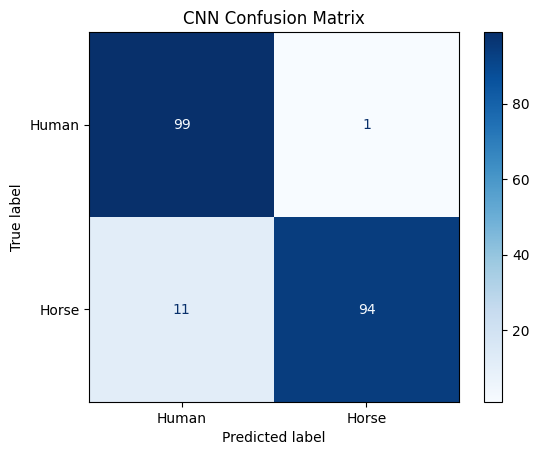

In [19]:
plot_confusion_matrix(model, test_data, "CNN")

In [ ]:
print(f"Test Loss: {loss:.2f}, Test Accuracy: {accuracy:.2f}")

In [22]:
y_pred = model.predict(test_data)

y_pred_classes = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to binary class labels

# Get true labels
y_true = test_data.classes

# Calculate precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 504ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       100
           1       0.99      0.90      0.94       105

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.95      0.94      0.94       205

